# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [13]:
import  pandas as pd

In [15]:
import os
print(os.getcwd())


c:\Users\rathe\OneDrive\Desktop\Medicine Recommendation system\medicine recommendation\medi project\models


In [16]:
import pandas as pd

dataset = pd.read_csv(r"c:\Users\rathe\OneDrive\Desktop\Medicine Recommendation system\medicine recommendation\medi project\datasets\Training.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


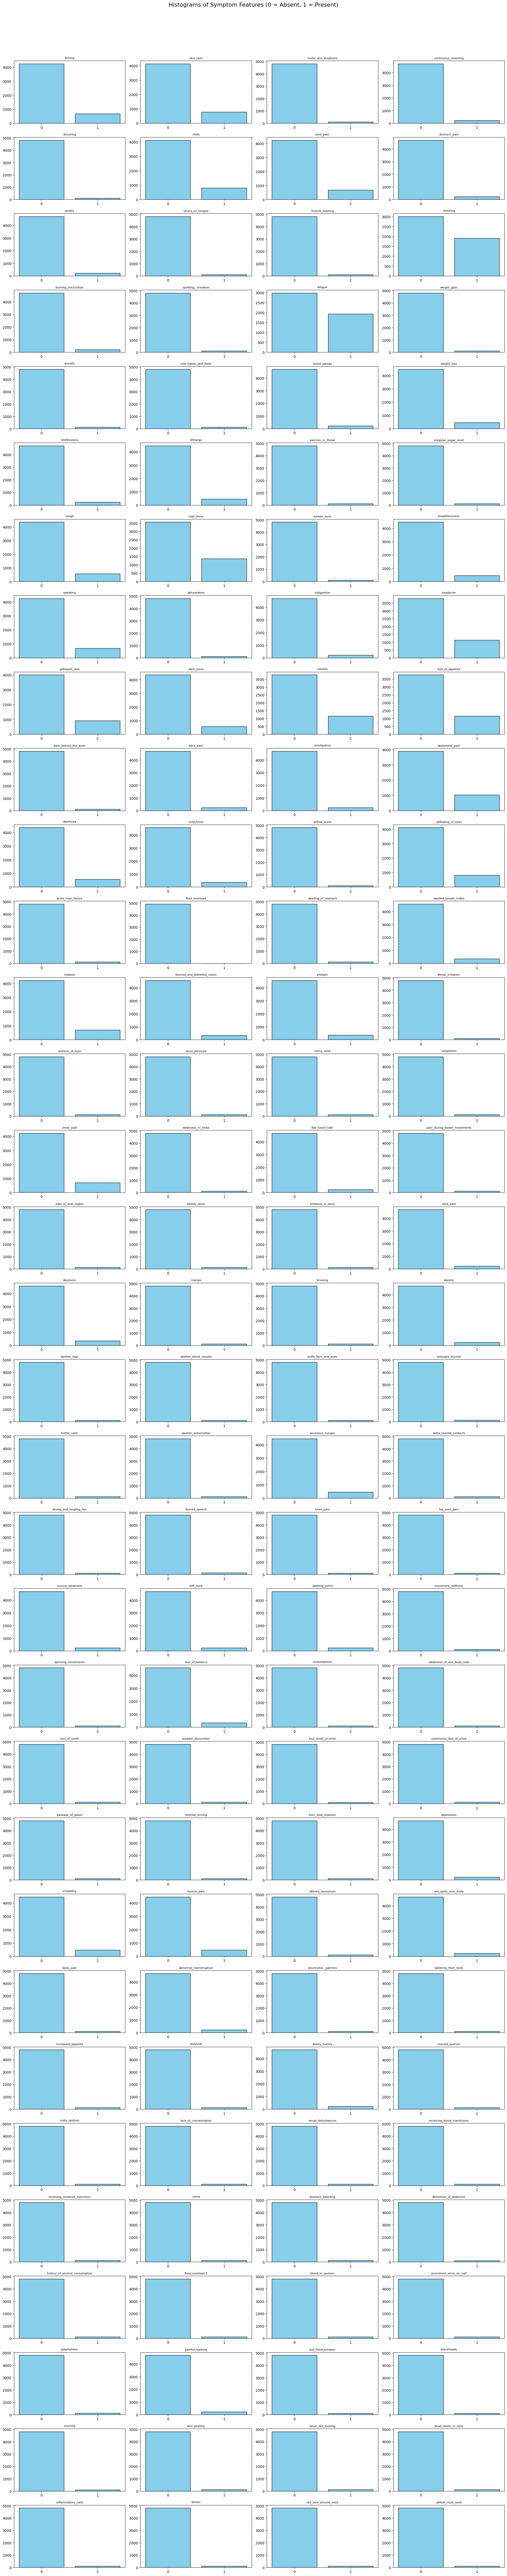

In [23]:
import matplotlib.pyplot as plt
print(dataset.info())

import matplotlib.pyplot as plt

# Drop the target column ("prognosis") since it's categorical, we focus on binary symptom features
symptom_data = dataset.drop(columns=["prognosis"])

# Plot histograms for each symptom (0/1 features)
n_cols = 4  # number of plots per row
n_rows = (len(symptom_data.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 3))

for i, column in enumerate(symptom_data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(symptom_data[column], bins=[-0.5, 0.5, 1.5], rwidth=0.8, color="skyblue", edgecolor="black")
    plt.xticks([0, 1])
    plt.title(column, fontsize=8)
    plt.tight_layout()

plt.suptitle("Histograms of Symptom Features (0 = Absent, 1 = Present)", fontsize=16, y=1.02)
plt.show()


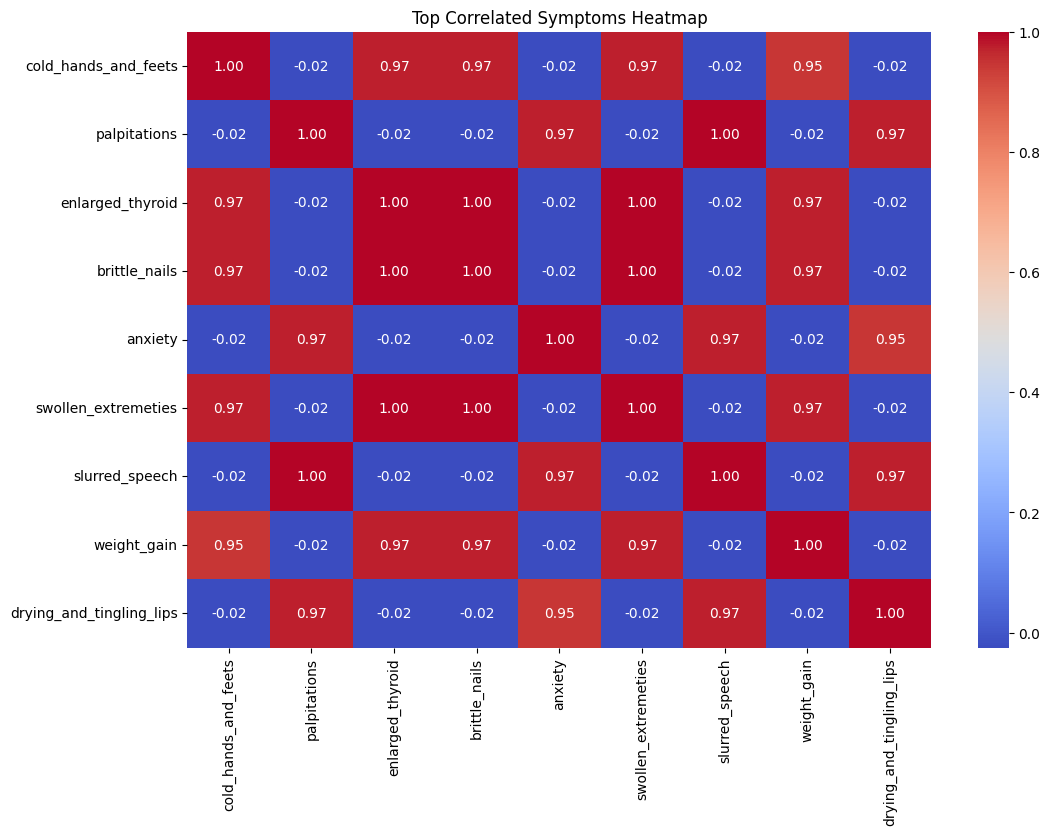

In [22]:
corr_matrix = dataset.drop(columns=["prognosis"]).corr()

# Select top 20 most correlated features (absolute correlation)
top_corr_features = corr_matrix.abs().unstack().sort_values(ascending=False)
top_corr_features = top_corr_features[top_corr_features < 1]  # remove self-correlation
top_pairs = top_corr_features.head(20)

# Get unique feature names
top_features = list(set([i[0] for i in top_pairs.index] + [i[1] for i in top_pairs.index]))

# Plot heatmap of only these features
plt.figure(figsize=(12, 8))
sns.heatmap(dataset[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Symptoms Heatmap")
plt.show()

In [24]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [25]:
# vals = dataset.values.flatten()

In [26]:
dataset.shape

(4920, 133)

# train test split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [28]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Training top models

In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

# single prediction

In [30]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [31]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [32]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

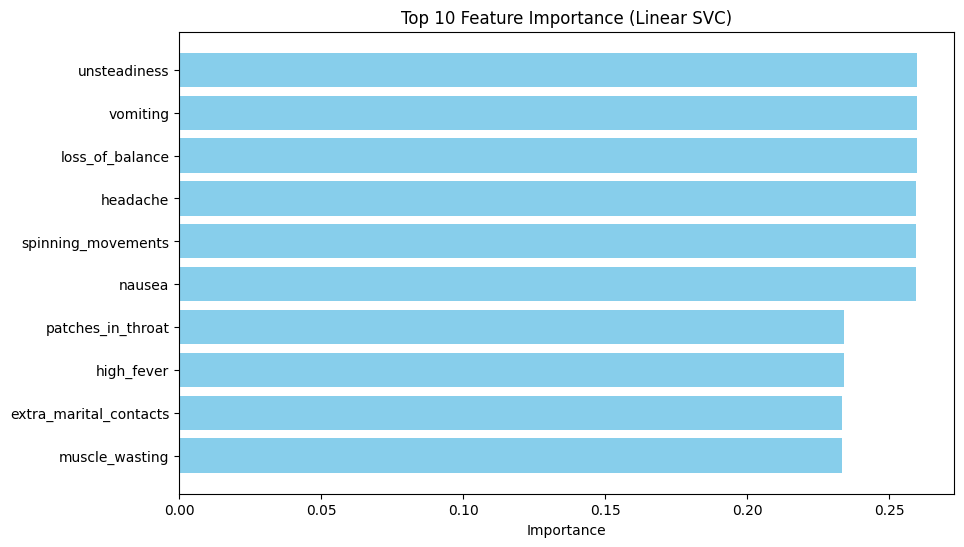

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import joblib  # for loading saved model

# Load your trained model
model = joblib.load("svc.pkl")  # replace with your saved model path

# Load dataset (only features, target not required for coef_ method)
data = pd.read_csv(r"c:\Users\rathe\OneDrive\Desktop\Medicine Recommendation system\medicine recommendation\medi project\datasets\Training.csv")  # replace with your dataset
X = data.drop("prognosis", axis=1)         # replace 'target' with your target column

# -------------------------
y = data["prognosis"]

top_n = 10  # Number of top features to display

# -----------------------------
# Linear SVC
if hasattr(model, "coef_"):  
    feature_importance = np.abs(model.coef_[0])
    features = X.columns
    importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
    importance_df = importance_df.sort_values(by="Importance", ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10,6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} Feature Importance (Linear SVC)")
    plt.show()


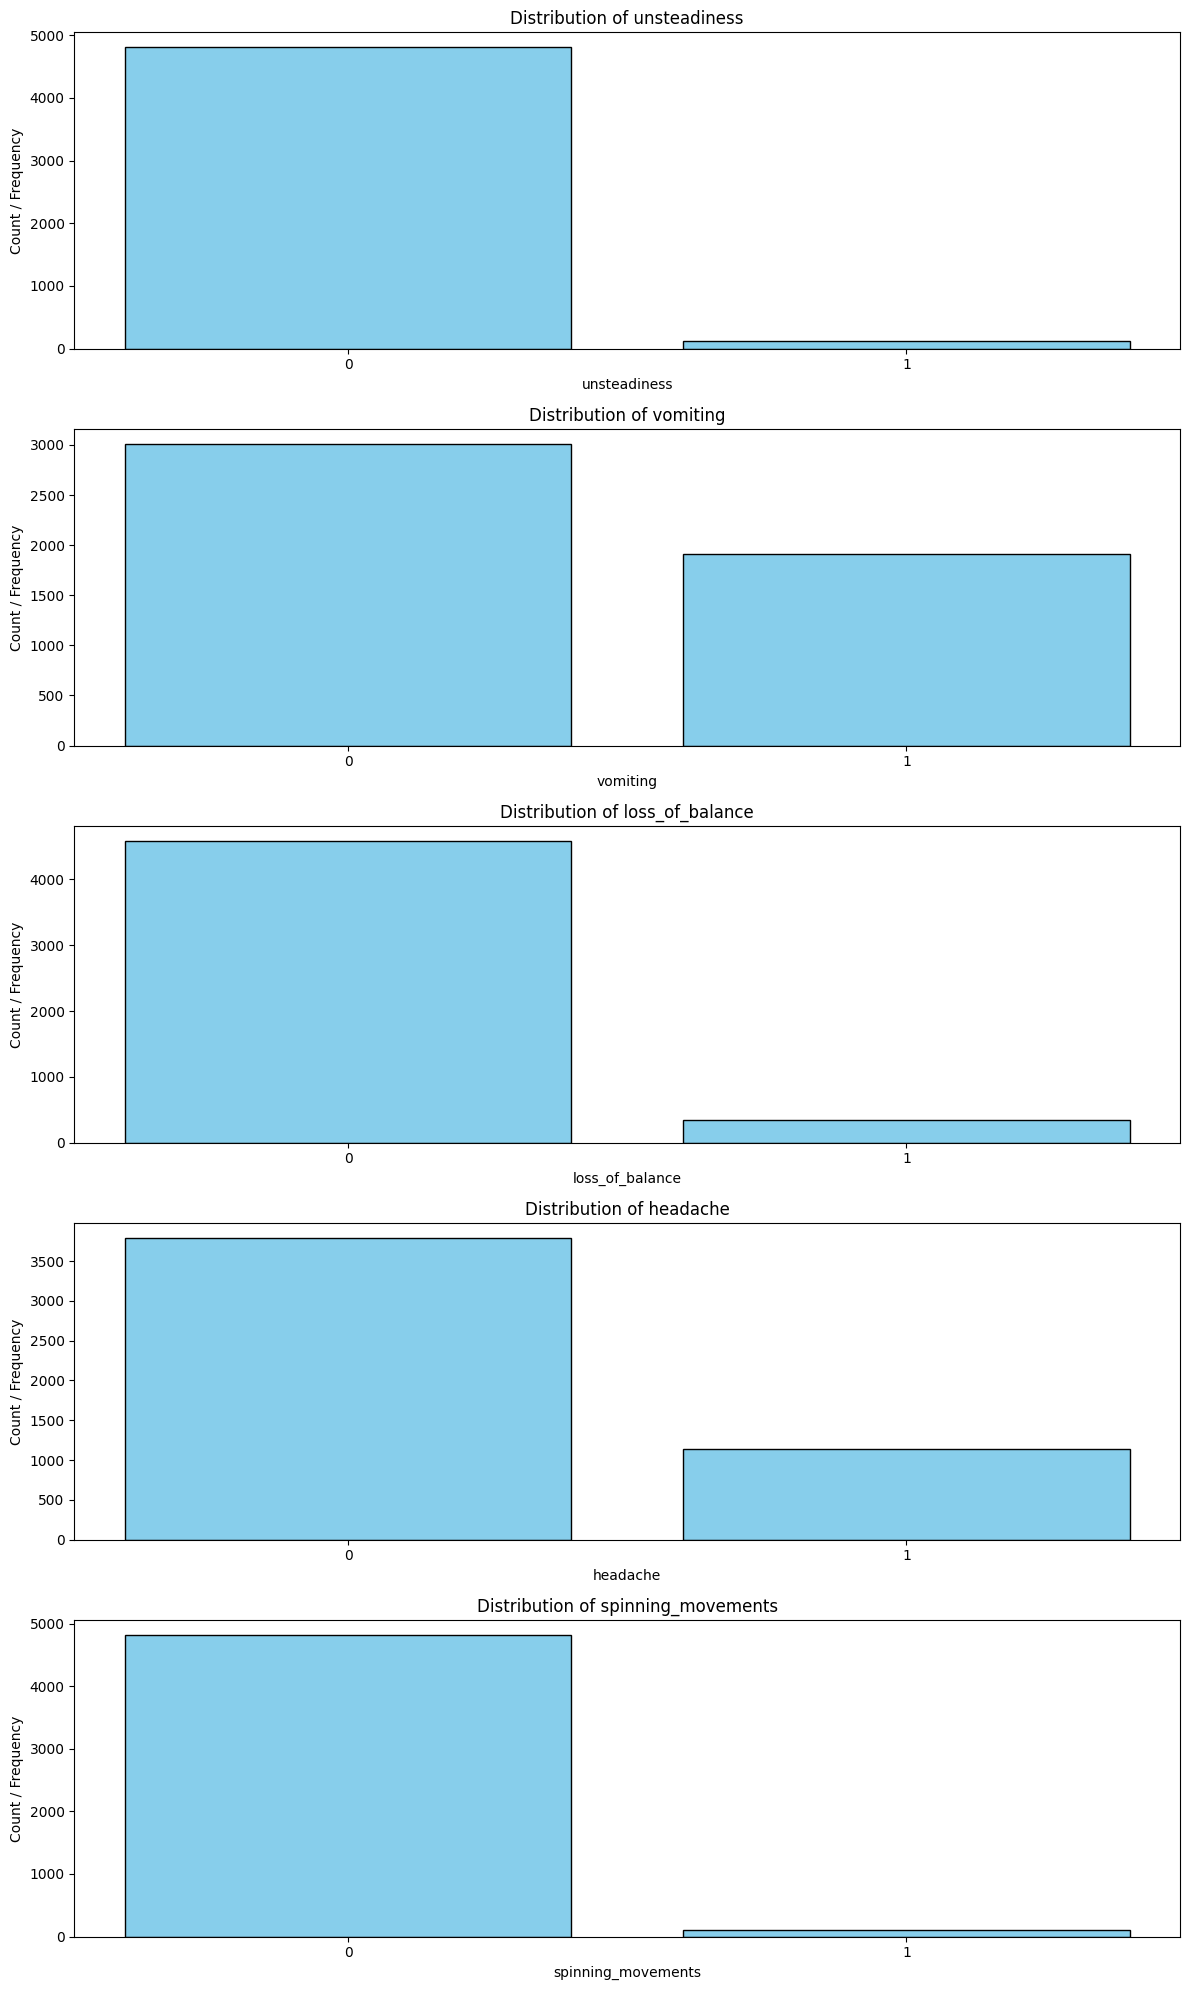

In [40]:
X = data.drop("prognosis", axis=1)         # replace 'target' with your target column

# -------------------------
y = data["prognosis"]

top_n = 5  # Number of top features to display

# -----------------------------

# Get top features
if hasattr(model, "coef_"):  
    feature_importance = np.abs(model.coef_[0])
    features = X.columns
    importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
    top_features = importance_df.sort_values(by="Importance", ascending=False).head(top_n)["Feature"].values
else:
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    perm_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
    top_features = perm_df.sort_values(by="Importance", ascending=False).head(top_n)["Feature"].values

# Plot bar plots for top features
plt.figure(figsize=(12, 4*top_n))
for i, feature in enumerate(top_features):
    plt.subplot(top_n, 1, i+1)
    if X[feature].nunique() <= 10:  # categorical or binary
        counts = X[feature].value_counts().sort_index()
        plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')
    else:  # continuous
        plt.hist(X[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count / Frequency")
plt.tight_layout()
plt.show()

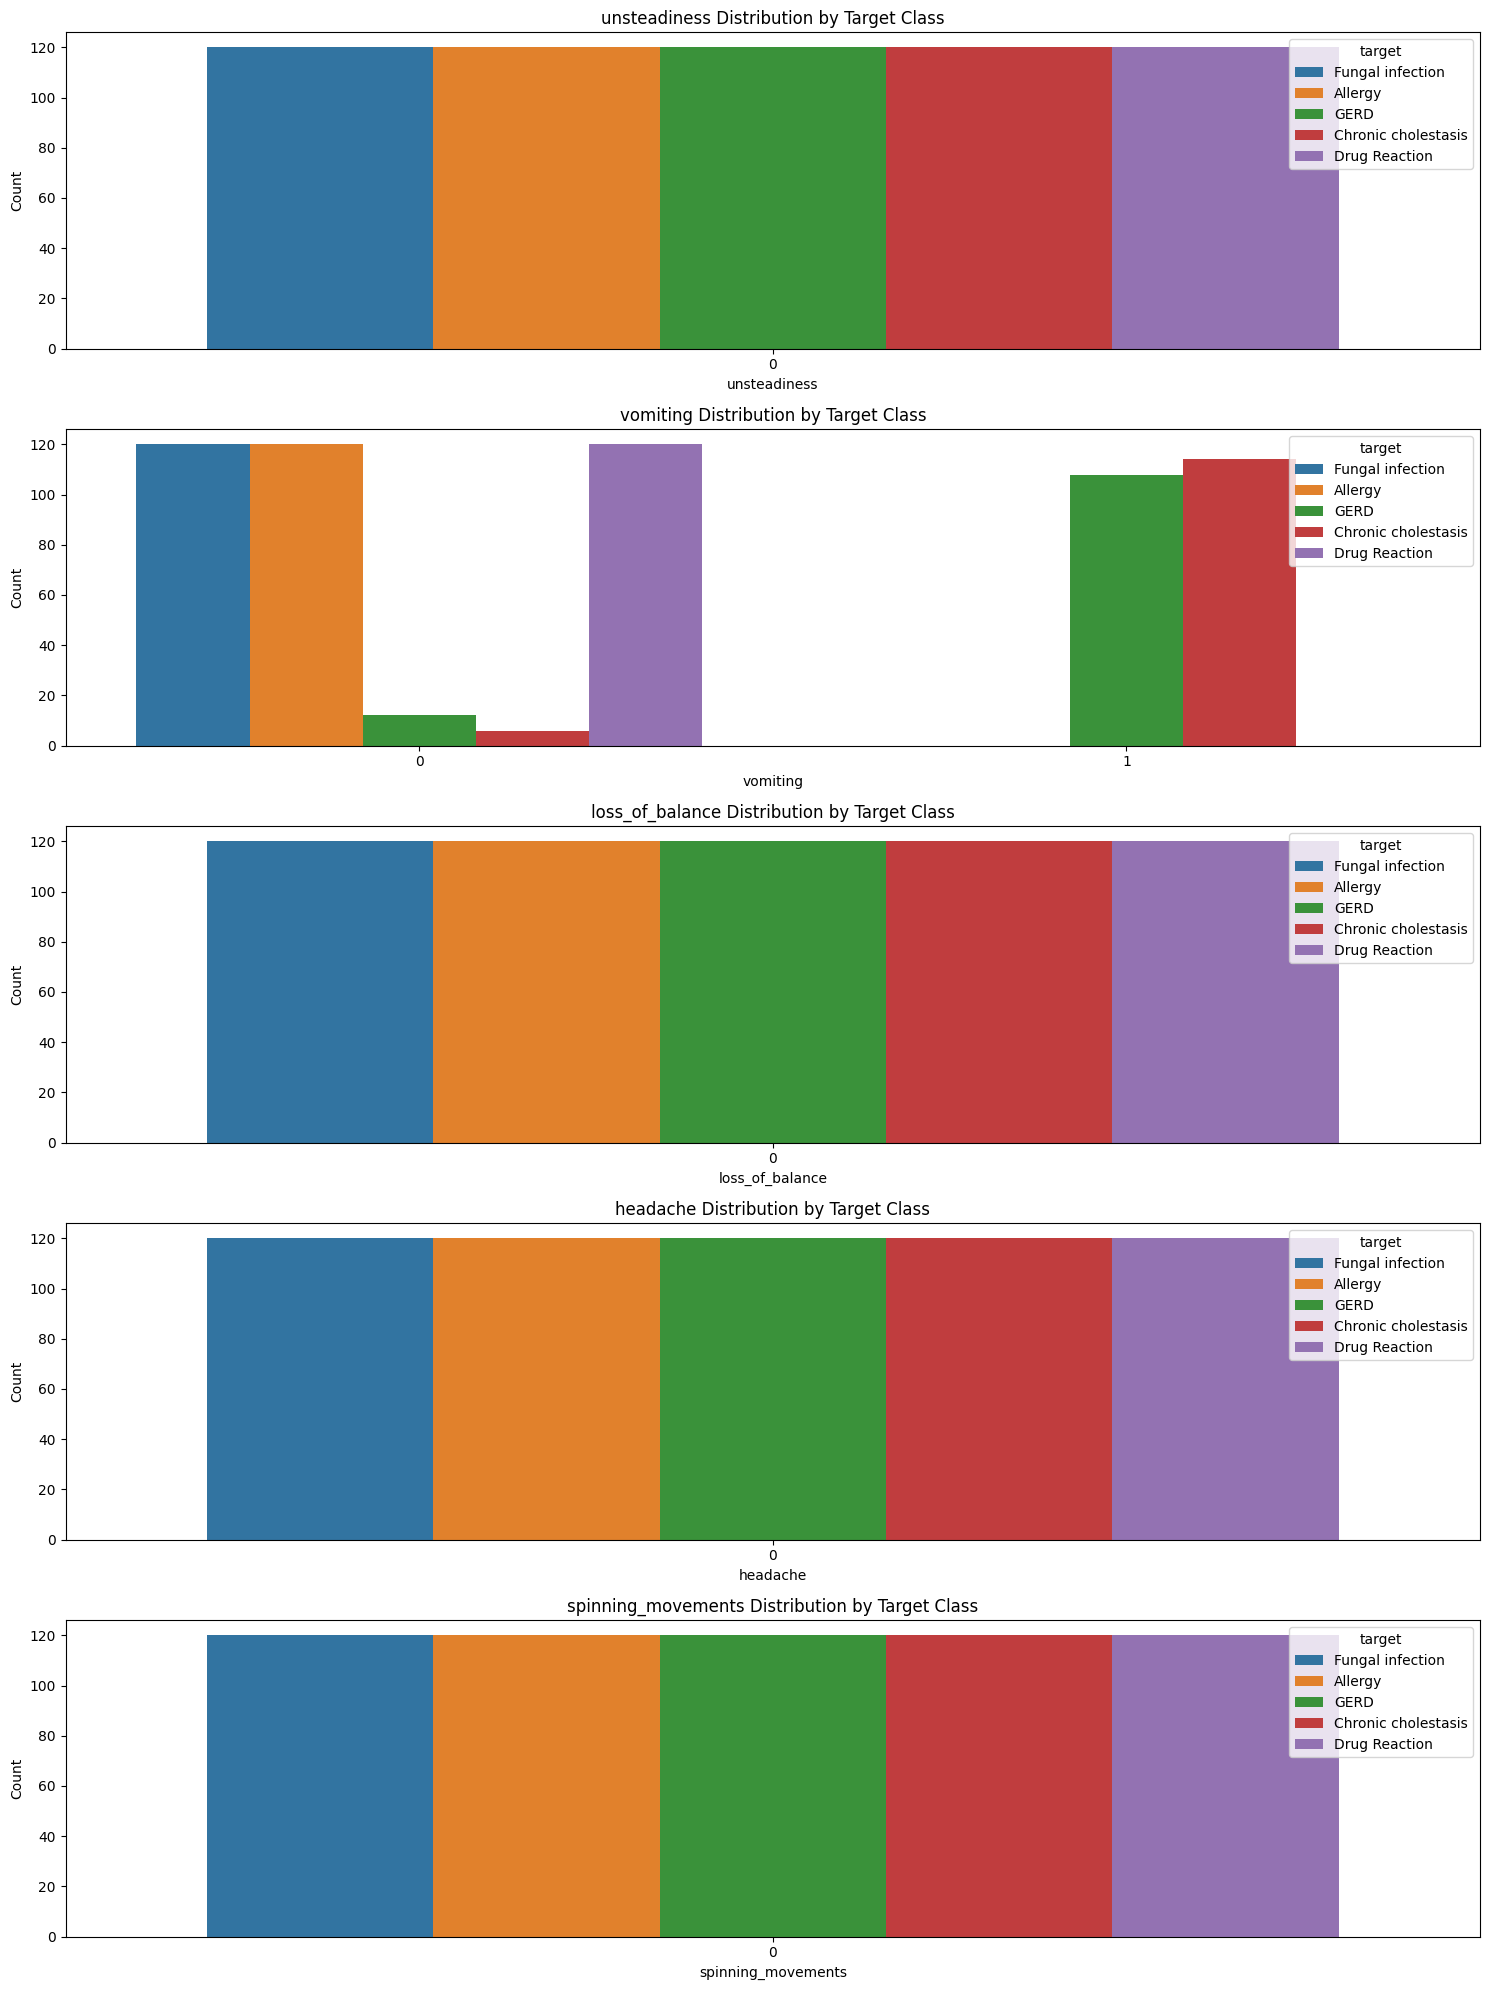

In [44]:
X = data.drop("prognosis", axis=1)         # replace 'target' with your target column

# -------------------------
y = data["prognosis"]


top_n_features = 5  # Number of top features to plot
top_n_classes = 5   # Number of target classes to display

# Keep only top target classes by frequency
top_classes = y.value_counts().nlargest(top_n_classes).index
mask = y.isin(top_classes)
X = X[mask]
y = y[mask]

# Get top features
if hasattr(model, "coef_"):
    feature_importance = abs(model.coef_[0])
    features = X.columns
    importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
    top_features = importance_df.sort_values(by="Importance", ascending=False).head(top_n_features)["Feature"].values
else:
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    perm_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
    top_features = perm_df.sort_values(by="Importance", ascending=False).head(top_n_features)["Feature"].values

# Combine X and y for plotting
df = X.copy()
df['target'] = y

# Plot all top features in a single figure
plt.figure(figsize=(15, 4*top_n_features))
for i, feature in enumerate(top_features):
    plt.subplot(top_n_features, 1, i+1)
    if df[feature].nunique() <= 10:  # categorical/binary
        sns.countplot(x=feature, hue='target', data=df, palette='tab10')
        plt.ylabel("Count")
    else:  # continuous
        sns.kdeplot(data=df, x=feature, hue='target', fill=True, alpha=0.5, palette='tab10')
        plt.ylabel("Density")
    plt.title(f"{feature} Distribution by Target Class")
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [45]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


C:\Users\rathe\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [46]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


C:\Users\rathe\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction

# load database and use logic for recommendations

In [47]:
sym_des = pd.read_csv("datasets/symtoms_df.csv")
precautions = pd.read_csv("datasets/precautions_df.csv")
workout = pd.read_csv("datasets/workout_df.csv")
description = pd.read_csv("datasets/description.csv")
medications = pd.read_csv('datasets/medications.csv')
diets = pd.read_csv("datasets/diets.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/symtoms_df.csv'

In [35]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [37]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


C:\Users\rathe\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms.......yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
=================medications==================
5 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================workout==================
6 :  Maintain good hygiene
7 :  Stay hydrated
8 :  Consume nutrient-rich foods
9 :  Limit sugary foods and beverages
10 :  Include foods rich in vitamin C
11 :  Consult a healthcare professional
12 :  Follow medical recommendations
13 :  Avoid scratching
14 :  Take prescribed antibiotics
15 :  Practice wound care
=================diets=====

C:\Users\naimat\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [36]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.6.1
